<a href="https://colab.research.google.com/github/michaeledge27/CSCI290/blob/main/notebooks/premierLeagueProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
dimport pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math

In [ ]:
url = "https://github.com/michaeledge27/CSCI290/raw/main/data/matches.csv"
df = pd.read_csv(url)
df.head()

,Unnamed: 0,date,time,comp,round,day,venue,result,gf,ga,...,match report,notes,sh,sot,dist,fk,pk,pkatt,season,team
0,0,2020-09-21,20:15 (21:15),Premier League,Matchweek 2,Mon,Away,W,3,1,...,Match Report,NaN,13,8,21.1,2,1,1,2024,Manchester City
1,2,2020-09-27,16:30 (17:30),Premier League,Matchweek 3,Sun,Home,L,2,5,...,Match Report,NaN,16,5,19.8,1,0,0,2024,Manchester City
2,4,2020-10-03,17:30 (18:30),Premier League,Matchweek 4,Sat,Away,D,1,1,...,Match Report,NaN,23,1,18.2,1,0,0,2024,Manchester City
3,5,2020-10-17,17:30 (18:30),Premier League,Matchweek 5,Sat,Home,W,1,0,...,Match Report,NaN,13,5,17.7,0,0,0,2024,Manchester City
4,7,2020-10-24,12:30 (13:30),Premier League,Matchweek 6,Sat,Away,D,1,1,...,Match Report,NaN,14,7,20.9,1,0,0,2024,Manchester City


In [ ]:

df['win'] = (df['result']=='W') * 1
df['win'].head()

,win
0,1
1,0
2,0
3,1
4,0


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
train_set, test_set = train_test_split(df, test_size = 0.2, shuffle = True)

In [ ]:
def Attribute_selection_method(dataFrame, target, measure):
  features = dataFrame.columns[dataFrame.columns != target]
  # splittingMeasure = dataFrame.columns[df.columns[1] if df.columns[1] != target else df.columns[2]]
  if measure == 'entropy':
    # calculate max entropy
    for feature in features:
      entropiesList = []
      counts = np.bincount(feature) #change to props stuff
      countProb = counts/len(features)
      entropyValue = -np.sum(countProb * np.log2(countProb))
      entropiesList.append(entropyValue)
      return features[entropiesList.index(min(entropiesList))]


  elif measure == 'gini':
    # calculate max entropy
    for feature in features:
      giniList = []
      counts = np.bincount(feature)
      countProb = counts/len(features)
      giniValue = 1 - np.sum(np.square(countProb))
      giniList.append(giniValue)
      return features[giniList.index(max(giniList))]

  else:
    return None


In [ ]:
target = "win"
attribute = "xga"

In [ ]:
vals = df[attribute].unique()
vals

array([0.6, 2.9, 2.4, 0.9, 0.3, 0.5, 1.2, 0.7, 0.4, 0.8, 0.2, 0.1, 1. ,
       1.5, 1.7, 1.6, 2.2, 1.1, 2.5, 3.4, 2. , 1.3, 1.8, 1.4, 2.7, 2.3,
       3.5, 1.9, 2.1, 3.1, 2.6, 4.1, 3.6, 0. , 3.3, 3. , 3.2, 3.9, 2.8,
       4.7, 3.7, 4. , 3.8, 7. , 4.5, 4.2, 5.2, 4.4, 4.3, 5.9, 4.6])

In [ ]:
props = df[df[attribute] == vals[8]][target].value_counts(normalize=True)
props

,proportion
win,
1,0.649425
0,0.350575


In [ ]:
entropy = 0
for i in range(len(props)):
  entropy = entropy - props[i]*math.log2(props[i])
entropy

0.9345802754794623

In [ ]:
entropy = 0
entropyLists = []
for val in vals:
  weight = (len(df[df[attribute] == val])) /(len(df))
  props = df[df[attribute] == val][target].value_counts(normalize=True)
  for p in range(len(props)):
    entropy = entropy - weight*(p*(np.log2)(p))
    entropyLists.append(entropy)
returnValue = vals[entropyLists.index(min(entropyLists))]
returnValue


<ipython-input-98-60b436c7c705>:7: RuntimeWarning: divide by zero encountered in log2
  entropy = entropy - weight*(p*(np.log2)(p))
<ipython-input-98-60b436c7c705>:7: RuntimeWarning: invalid value encountered in scalar multiply
  entropy = entropy - weight*(p*(np.log2)(p))


0.6

In [ ]:
giniImpurity = 0
giniLists = []
for val in vals:
  weight = (len(df[df[attribute] == val])) /(len(df))
  props = df[df[attribute] == val][target].value_counts(normalize=True)
  for p in range(len(props)):
    gini = 1 - np.sum(np.square(p))
    giniLists.append(gini)
returnValue = vals[giniLists.index(max(giniLists))]
returnValue

0.6

In [ ]:

def attribute_selection_method2(df, target, measure):

  vals = df[target].unique()
  features = df.columns.drop(target)

  if measure == 'entropy':
    entropyLists = []
    for feature in features:
      entropy = 0
      for val in vals:
        weight = (len(df[df[feature] != val])) /(len(df))
        props = df[df[feature] == val][target].value_counts(normalize=True)
        for p in props:
          entropy = entropy - weight*(p*(np.log2)(p))
          entropyLists.append(entropy)
    return features[np.argmin(entropyLists)]

  if measure == 'gini':
    giniLists = []
    for feature in features:
      gini = 0
      for val in vals:
        weight = (len(df[df[feature] == val])) /(len(df))
        props = df[df[feature] == val][target].value_counts(normalize=True)
        for p in props:
          gini = 1 - (weight * np.sum(np.square(p)))
          giniLists.append(gini)
    return features[np.argmin(giniLists)]

  else:
    raise ValueError("Measure must be 'entropy' or 'gini'")






In [ ]:
def attribute_selection_method3(df, target, measure):
    # ... (rest of the function code)
    if measure == 'entropy':
        entropyList = []
        features = df.columns.drop(target)
        for feature in features:
            classes = df[target].unique()
            entropy = 0
            # Calculate Gini index for each feature
            for Class in classes:
                df_sub = df[df[target] == Class]
                p = len(df_sub)/len(df)
                if len(df[feature].unique()) == 1: # If the feature has only one value
                    entropy = 0
                else:
                    for value in df[feature].unique():
                        df_sub2 = df_sub[df_sub[feature] == value]
                        weight = len(df_sub2)/len(df_sub)
                        p = len(df_sub2)/len(df)
                        # Calculate Gini impurity for each value of the feature
                        entropy = entropy - weight*(p*(np.log2)(p))
                entropyList.append(entropy) # Append the calculated Gini index to the list
        return features[np.argmin(entropyList)] # Return the feature with the lowest Gini index


    if measure == 'gini':
        giniLists = []
        features = df.columns.drop(target)
        for feature in features:
            classes = df[target].unique()
            gini = 0
            # Calculate Gini index for each feature
            for Class in classes:
                df_sub = df[df[target] == Class]
                p = len(df_sub)/len(df)
                if len(df[feature].unique()) == 1: # If the feature has only one value
                    gini = 0
                else:
                    for value in df[feature].unique():
                        df_sub2 = df_sub[df_sub[feature] == value]
                        weight = len(df_sub2)/len(df_sub)
                        p = len(df_sub2)/len(df)
                        # Calculate Gini impurity for each value of the feature
                        gini = 1 - (weight * np.sum(np.square(p)))
                giniLists.append(gini) # Append the calculated Gini index to the list
        return features[np.argmin(giniLists)] # Return the feature with the lowest Gini index


    else:
            raise ValueError("Measure must be 'entropy' or 'gini'")

    # ... (rest of the function code)

In [ ]:
def compute_entropy(df, feature, target, vals):
    entropy = 0
    for val in vals:
        subset = df[df[feature] == val]
        weight = len(subset) / len(df)
        props = subset[target].value_counts(normalize=True)
        for p in props:
            entropy -= weight * p * np.log2(p) if p > 0 else 0
    return entropy

def compute_gini(df, feature, target, vals):
    gini = 0
    for val in vals:
        subset = df[df[feature] == val]
        weight = len(subset) / len(df)
        props = subset[target].value_counts(normalize=True)
        gini += weight * (1 - np.sum(np.square(props)))
    return gini

def attribute_selection_method4(df, target, measure):
    vals = df[target].unique()
    features = df.columns.drop(target)

    if measure == 'entropy':
        entropy_values = [compute_entropy(df, feature, target, vals) for feature in features]
        return features[np.argmin(entropy_values)]

    elif measure == 'gini':
        gini_values = [compute_gini(df, feature, target, vals) for feature in features]
        return features[np.argmin(gini_values)]

    else:
        raise ValueError("Measure must be 'entropy' or 'gini'")

In [ ]:
train_set.columns

Index(['Unnamed: 0', 'date', 'time', 'comp', 'round', 'day', 'venue', 'result',
       'gf', 'ga', 'opponent', 'xg', 'xga', 'poss', 'attendance', 'captain',
       'formation', 'referee', 'match report', 'notes', 'sh', 'sot', 'dist',
       'fk', 'pk', 'pkatt', 'season', 'team', 'win'],
      dtype='object')

In [ ]:
train_set = train_set[['date', 'time', 'comp', 'day', 'round', 'venue', 'xga', 'poss', 'sot', 'fk', 'pk', 'win']]

In [ ]:
test_set = test_set[['round', 'venue', 'xga', 'poss', 'sot', 'fk', 'pk', 'win']]

In [ ]:
X_train = train_set[['round', 'venue', 'xga', 'poss', 'sot', 'fk', 'pk']]
y_train = train_set[['win']]

In [ ]:
X_test = test_set[['round', 'venue', 'xga', 'poss', 'sot', 'fk', 'pk']]
y_test = test_set[['win']]

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import cross_val_score
from sklearn.tree import plot_tree

In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3830 entries, 1927 to 1517
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   round   3830 non-null   object 
 1   venue   3830 non-null   object 
 2   xga     3830 non-null   float64
 3   poss    3830 non-null   int64  
 4   sot     3830 non-null   int64  
 5   fk      3830 non-null   int64  
 6   pk      3830 non-null   int64  
dtypes: float64(1), int64(4), object(2)
memory usage: 239.4+ KB


In [ ]:
num_attributes = X_train.select_dtypes(include = ['int64', 'float64']).columns
cat_attributes = X_train.select_dtypes(include = ['object']).columns

In [ ]:
trf = [ ('num', StandardScaler(), num_attributes),
       ('cat', OneHotEncoder( handle_unknown='ignore'), cat_attributes) ]
col_transform = ColumnTransformer( transformers = trf )

In [ ]:
pipeline = Pipeline( steps = [('pre', col_transform),
 ('clf', DecisionTreeClassifier(max_depth=4))])

In [ ]:
cross_val_score( pipeline, X_train, y_train, cv=5, scoring='accuracy')

array([0.73890339, 0.72976501, 0.69843342, 0.72976501, 0.72976501])

In [ ]:
cross_val_score( pipeline, X_train, y_train, cv=5, scoring='f1')

array([0.64788732, 0.57494867, 0.54794521, 0.59491194, 0.60115607])

In [ ]:
model = pipeline.fit( X_train, y_train )
model

Pipeline(steps=[('pre',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['xga', 'poss', 'sot', 'fk', 'pk'], dtype='object')),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index(['round', 'venue'], dtype='object'))])),
                ('clf', DecisionTreeClassifier(max_depth=4))])

In [ ]:
predictions = pipeline.predict( X_test )

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [ ]:
cm = confusion_matrix( y_test, predictions )
cm

array([[515,  84],
       [157, 202]])

[Text(0.5, 0.9, 'x[2] <= 0.505\ngini = 0.48\nsamples = 3830\nvalue = [2294, 1536]'),
 Text(0.25, 0.7, 'x[0] <= -0.26\ngini = 0.414\nsamples = 2763\nvalue = [1953, 810]'),
 Text(0.125, 0.5, 'x[4] <= 1.13\ngini = 0.496\nsamples = 1155\nvalue = [631, 524]'),
 Text(0.0625, 0.3, 'x[2] <= -0.717\ngini = 0.481\nsamples = 1009\nvalue = [603, 406]'),
 Text(0.03125, 0.1, 'gini = 0.286\nsamples = 272\nvalue = [225, 47]'),
 Text(0.09375, 0.1, 'gini = 0.5\nsamples = 737\nvalue = [378, 359]'),
 Text(0.1875, 0.3, 'x[28] <= 0.5\ngini = 0.31\nsamples = 146\nvalue = [28, 118]'),
 Text(0.15625, 0.1, 'gini = 0.296\nsamples = 144\nvalue = [26, 118]'),
 Text(0.21875, 0.1, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.375, 0.5, 'x[0] <= 0.608\ngini = 0.292\nsamples = 1608\nvalue = [1322, 286]'),
 Text(0.3125, 0.3, 'x[2] <= -0.31\ngini = 0.377\nsamples = 826\nvalue = [618, 208]'),
 Text(0.28125, 0.1, 'gini = 0.277\nsamples = 493\nvalue = [411, 82]'),
 Text(0.34375, 0.1, 'gini = 0.47\nsamples = 333\nvalu

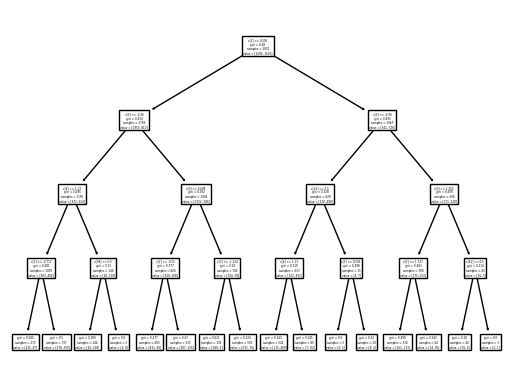

In [ ]:
plot_tree(pipeline.named_steps['clf'])

In [ ]:
attribute_selection_method4(df, 'win', 'gini')

'date'